# `carculator_bus`: prospective life-cycle assessment tool for city and intercity buses


Author: Romain Sacchi, PSI\
Date: April 9<sup>th</sup>, 2021\
Code repo: https://github.com/romainsacchi/carculator_bus

## Vehicles list

Powertrains included:
* **ICEV-d**: diesel bus
* **ICEV-g**: compressed gas bus
* **HEV-d**: hybrid diesel bus
* **PHEV-d**: plugin hybrid diesel bus
* **FCEV**: fuel cell bus
* **BEV-depot**: battery electricity bus, overnight charging at depot
* **BEV-opp**: battery electric bus, opportunity charging
* **BEV-motion**: trolleybus, en route charging. Assisted with a diesel generator until 2010, and with a battery after that.

Vehicles followed by "^" are only available starting 2020.

**size/powertrain/years**|**ICEV-d**|**ICEV-g**|**HEV-d^**|**FCEV^**|**BEV-depot^**|**BEV-opp^**|**BEV-motion**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
9m (midibus)| | | | | | |
13m, single deck, city| | | | | | |
13m, single deck, coach| | | | | |not avail.|not avail.
13m, double deck, city| | | | | | |
13m, double deck, coach| | | | | |not avail.|not avail.
13m, articulated, city| | | | | | |

## Sizing of base frame

It is essentially based on the following report: https://ec.europa.eu/clima/sites/clima/files/transport/vehicles/heavy/docs/hdv_lightweighting_en.pdf p.17-19

Detailed weight composition was obtained for **Midibus, 12t** and **Single deck, coach, 19t**.\
Curb mass was obtained for all size classes, the rest is adjusted function of the gross mass.\


|                   |                     | **Midibus, 12t** | **Single deck, city bus, 19t** | **Single deck, city bus, 28t** | **Double deck, city bus, 26t** | **Single deck, coach, 19t** | **Double deck, coach, 26t** |
| ----------------- | ------------------- | ---------------- | ------------------------------ | ------------------------------ | ------------------------------ | --------------------------- | --------------------------- |
|                   | Type                | rigid, 2 axles   | rigid, 2 axles                 | articulated, 3 axles           | rigid, 3 axles                 | rigid, 2 axles              | rigid, 3 axles              |
| in kilograms      | Gross weight        | 12’000           | 19’000                         | 28’000                         | 26’000                         | 19’000                      | 26’000                      |
| Powertrain        | Engine system       | 399              | 931                            | 1’121                          | 1’121                          | 1’121                       | 1’200                       |
|                   | Coolant system      | 84               | 116                            | 168                            | 130                            | 140                         | 182                         |
|                   | Fuel system         | 46               | 66                             | 96                             | 74                             | 80                          | 104                         |
|                   | Exhaust system      | 60               | 98                             | 142                            | 110                            | 118                         | 153                         |
|                   | Transmission system | 451              | 395                            | 571                            | 443                            | 476                         | 618                         |
| Electrical system |                     | 135              | 183                            | 264                            | 205                            | 220                         | 286                         |
| Chassis system    | Frame               | 472              | 695                            | 1’004                          | 778                            | 837                         | 1’087                       |
|                   | Suspension          | 1’032            | 1’490                          | 2’153                          | 1’669                          | 1’795                       | 2’331                       |
|                   | Braking system      | 149              | 272                            | 393                            | 305                            | 328                         | 426                         |
|                   | Wheels and tires    | 245              | 576                            | 832                            | 645                            | 694                         | 901                         |
| Cabin             | Cabin               | 0                | 0                              | 0                              | 0                              | 0                           | 0                           |
|                   | Body system         | 4’270            | 5’570                          | 8’045                          | 6’238                          | 6’709                       | 8’714                       |
| Other             |                     | 607              | 858                            | 1’462                          | 882                            | 1’033                       | 1’598                       |
| Curb mass         |                     | 7’950            | 11’250                         | 16’250                         | 12’600                         | 13’551                      | 17’600                      |
| Payload           |                     | 4’050            | 5’750                          | 9’750                          | 13’400                         | 5’450                       | 8’400                       |

The following components are common to all powertrains:
* Frame
* Suspension
* Brakes
* Wheels and tires,
* Electrical system
* Transmission
* Other components

## Other size-related parameters

A few other parameters for buses in 2020.

|                                | **unit**           | **Midibus, 9m**                          | **Single deck, city bus, 13m**     | **Single deck, city bus, 18m**     | **Double deck, city bus, 13m**   | **Single deck, coach, 13m** | **Double deck, coach, 13m**      | **Source**                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ------------------------------ | ------------------ | ---------------------------------------- | ---------------------------------- | ---------------------------------- | -------------------------------- | --------------------------- | -------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Lifetime                       | year               | 14                                       | 14 (20 for BEV-motion)             | 14 (20 for BEV-motion)             | 14                               | 14                          | 14                               | Derived from MOFIS vehicles registry (ASTRA 2021), similar value used in (Brian Cox et al. 2020) for buses                                                                                                                                                                                                                                                                                                                                                                |
| Annual kilometers              | km                 | 50’000                                   | 50’000                             | 50’000                             | 50’000                           | 50’000                      | 50’000                           | (SFO 2021e)                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| Lifetime                       | km                 | 700’000                                  | 700’000 (1’000’000 for BEV-motion) | 700’000 (1’000’000 for BEV-motion) | 700’000                          | 700’000                     | 700’000                          | Calculated from the two rows above.[\[BC1\]](file:///C:/Users/sacchi_r/Dropbox/Notebooks/MobiTool%20update/report/reviewed/re-reviewed/VehicleLCA_PSI_11.8.2021.docx#_msocom_1) [\[SR2\]](file:///C:/Users/sacchi_r/Dropbox/Notebooks/MobiTool%20update/report/reviewed/re-reviewed/VehicleLCA_PSI_11.8.2021.docx#_msocom_2) [\[SR3\]](file:///C:/Users/sacchi_r/Dropbox/Notebooks/MobiTool%20update/report/reviewed/re-reviewed/VehicleLCA_PSI_11.8.2021.docx#_msocom_3) |
| Average length                 | meter              | 9                                        | 13                                 | 18                                 | 13                               | 13                          | 13                               | Manufacturers’ data.                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| Number of axles                | unit               | 2                                        | 2                                  | 3 (1 driven)                       | 3 (1 driven)                     | 2                           | 3 (1 driven)                     |
| Axles load distribution        | % of total load    | 60% back, 40% front                      | 60% back, 40% front                | 60% back, 20% middle,  20% front   | 60% back, 20% middle,  20% front | 60% back, 40% front         | 60% back, 20% middle,  20% front | (European Commission 2018)                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Rolling resistance coefficient | unitless, per tire | 0.0055                                   | 0.0055                             | 0.0055                             | 0.0055                           | 0.0055                      | 0.0055                           |
| Number of tires per axle       | unit               | 2 per non-driven axle, 4 per driven axle | (European Commission 2018)         |
| 85% of tire load capacity      | N                  | 20’850                                   |
| Frontal area                   | square meter       | 6.06                                     | 8.07                               | 8.07                               | 9.45                             | 8.07                        | 9.45                             | Calculated from manufacturers’ data.                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| Passengers capacity            | unit               | 34                                       | 64                                 | 150                                | 83                               | 55                          | 70                               | Manufacturers’ data.                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| Passengers occupancy           | unit               | 5                                        | 10                                 | 19                                 | 13                               | 21                          | 26                               | Inferred from Mobitool factors v.2.1 values[\[BC4\]](file:///C:/Users/sacchi_r/Dropbox/Notebooks/MobiTool%20update/report/reviewed/re-reviewed/VehicleLCA_PSI_11.8.2021.docx#_msocom_4) [\[SR5\]](file:///C:/Users/sacchi_r/Dropbox/Notebooks/MobiTool%20update/report/reviewed/re-reviewed/VehicleLCA_PSI_11.8.2021.docx#_msocom_5)                                                                                                                                      |
| Load factor                    |                    | 16%                                      | 16%                                | 13%                                | 16%                              | 38%                         | 38%                              | Calculated from the two rows above.                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| Average passenger mass         | kilogram           | 75                                       | Standard assumption                |
| Passenger luggage mass         | kilogram           | 17                                       | (Schoemaker 2007).                 |

In [1]:
import carculator_bus
carculator_bus.__file__

'/opt/homebrew/Caskroom/miniforge/base/envs/bus_test/lib/python3.10/site-packages/carculator_bus/__init__.py'

In [2]:
from carculator_bus import *
bip = BusInputParameters() 
bip.static()
dcts, array = fill_xarray_from_input_parameters(bip, scope={"year":[2020]})
bm = BusModel(array)
bm.set_all()

Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+------------------+----------+-----------------+-----------+------------------+------+-----+
|                  | 13m-city | 13m-city-double | 13m-coach | 13m-coach-double | 18m  |  9m |
+------------------+----------+-----------------+-----------+------------------+------+-----+
| BEV-depot, 2020  |   10.0   |       13.0      |    21.0   |       26.0       | 19.0 | 5.0 |
| BEV-motion, 2020 |   10.0   |       13.0      |    21.0   |       26.0       | 19.0 | 5.0 |
|  BEV-opp, 2020   |   10.0   |       13.0      |    21.0   |       26.0       | 19.0 | 5.0 |
|    FCEV, 2020    |   10.0   |       13.0      |    21.0   |       26.0  

In [3]:
# print parameters for a regular diesel bus
bm.array.sel(powertrain="ICEV-d", year=2020, value=0, parameter=[
    "lifetime kilometers", "kilometers per year", "rolling resistance coefficient",
    "lightweighting", "frontal area", "average passengers", "average speed", "distance per trip", "operation time",
    "daily distance", "number of trips"
]).to_dataframe("val").unstack()["val"]

parameter,lifetime kilometers,kilometers per year,rolling resistance coefficient,lightweighting,frontal area,average passengers,average speed,distance per trip,operation time,daily distance,number of trips
size,,,,,,,,,,,
13m-city,700000.0,50000.0,0.0055,0.02,8.07,10.0,26.053354,39.550438,12.0,312.640259,7.904850
13m-city-double,700000.0,50000.0,0.0055,0.02,9.00,13.0,26.385971,39.549637,12.0,316.631653,8.005931
13m-coach,700000.0,50000.0,0.0055,0.02,8.07,21.0,56.792519,275.175507,9.0,511.132660,1.857479
13m-coach-double,700000.0,50000.0,0.0055,0.02,9.00,26.0,56.530075,275.175842,9.0,508.770691,1.848893
18m,700000.0,50000.0,0.0055,0.02,8.07,19.0,26.304758,39.552128,12.0,315.657104,7.980787
9m,700000.0,50000.0,0.0055,0.02,6.06,5.0,26.322498,39.549553,12.0,315.869995,7.986690


## Driving cycles

Driving cycles **Urban** and **Coach** from [VECTO](https://ec.europa.eu/clima/policies/transport/vehicles/vecto_en) are used.
First, approximative buses are modeled in VECTO (similar frontal area, drag cooeficient, number of axles, rolling friction coefficients, engine power).\

Simulations are run in VECTO. VECTO produces simulation files for which:
* the target speed,
* the measured speed (which considers the vehicle weight, engine torque, driver's anticipative behavior, etc.),
* the road gradient
* the different types of environmental resistances
* the different types of mechanical resistances (gearbox, drive axles, engine)
* and resulting energy consumption
are listed per second of driving.

We use the measured speed along time as driving cycles.

Here are the first 200 seconds of the Urban driving cycle. Note how speed profiles slightly differ across vehicles.
This is determined msotly by their power-to-mass ratio.

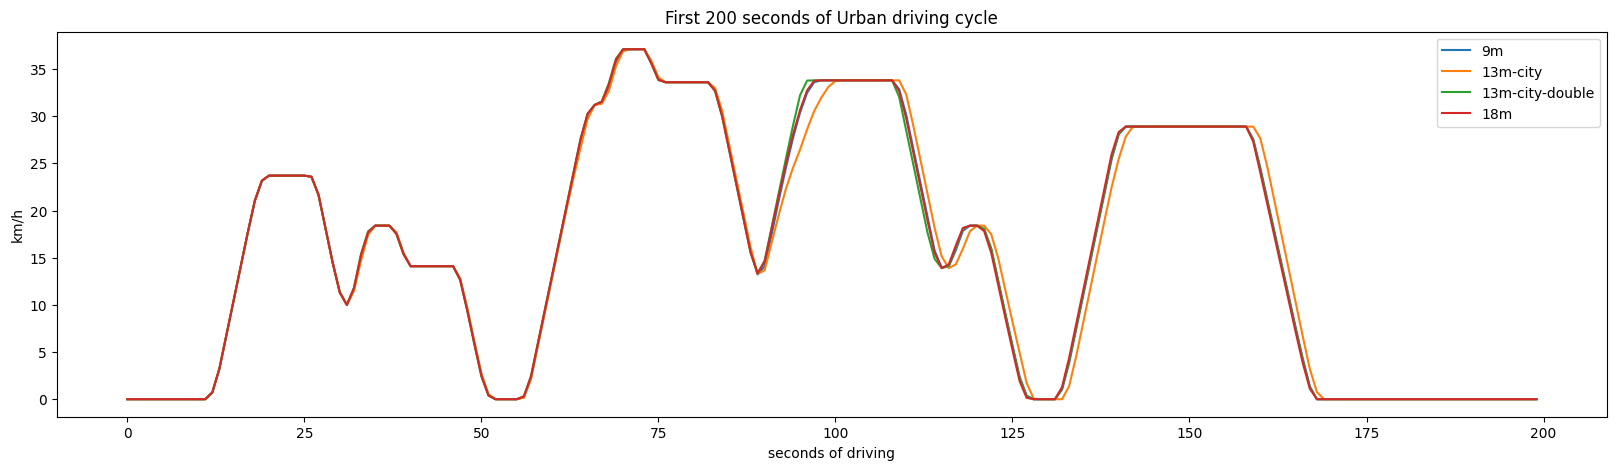

In [4]:
from carculator_bus import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(get_driving_cycle(size=["9m", "13m-city", "13m-city-double", "18m",])[:200,])
plt.ylabel("km/h")
plt.xlabel("seconds of driving")
plt.title("First 200 seconds of Urban driving cycle")
plt.legend(["9m", "13m-city", "13m-city-double", "18m", "Target speed"])

And here is the driving cycle for coach buses. Again, we notice slight differences between the speed profiles (the double deck coach bus being much heavier than its single deck counterpart).

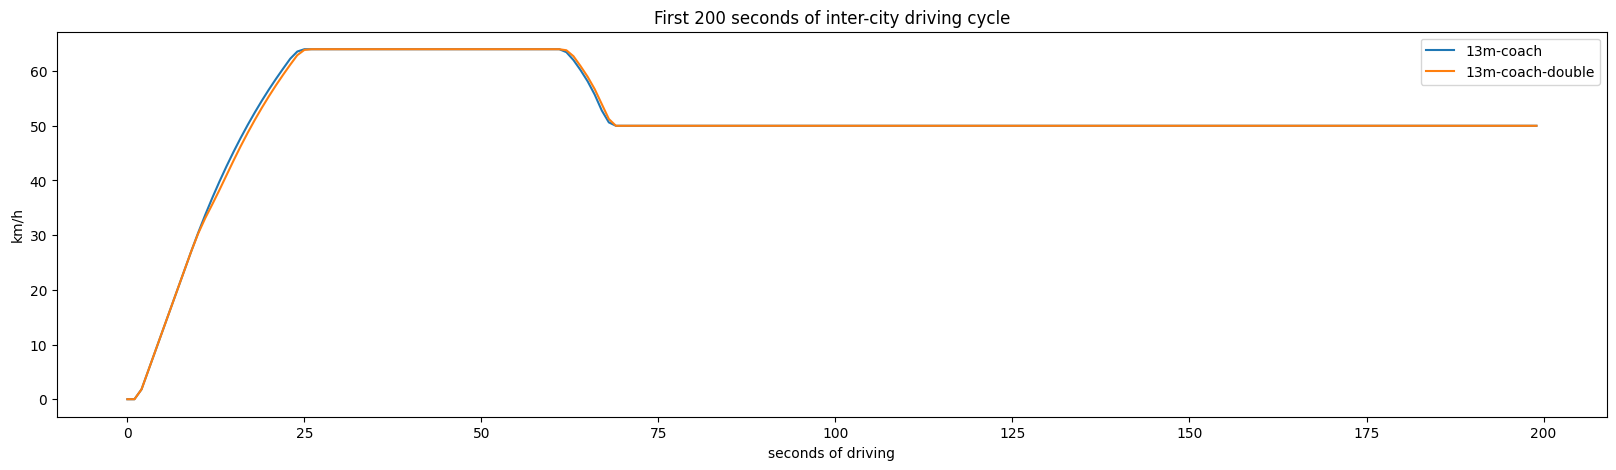

In [5]:
from carculator_bus import *
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(get_driving_cycle(size=["13m-coach", "13m-coach-double",])[:200,])
plt.ylabel("km/h")
plt.xlabel("seconds of driving")
plt.title("First 200 seconds of inter-city driving cycle")
plt.legend(["13m-coach", "13m-coach-double", "Target speed"])

Consequently, they also finish the driving cycle at differents points in time, as the last 200 seconds of the same driving cycle show.

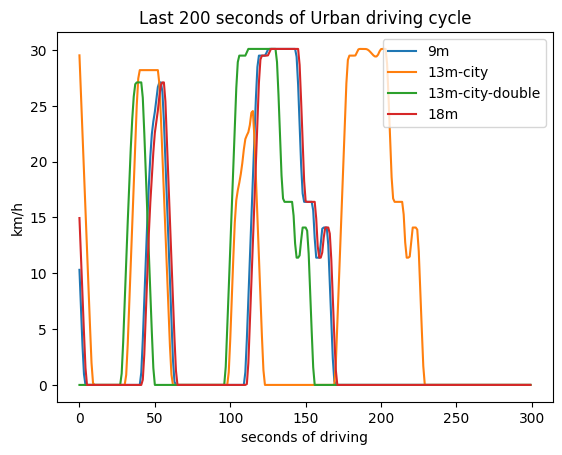

In [6]:
plt.plot(get_driving_cycle(size=["9m", "13m-city", "13m-city-double", "18m"])[7900:8200,])
plt.ylabel("km/h")
plt.xlabel("seconds of driving")
plt.title("Last 200 seconds of Urban driving cycle")
plt.legend(["9m", "13m-city", "13m-city-double", "18m"])

Road gradients are also considered.
Here is the road gradient profile of the urban driving cycle.

Text(0.5, 1.0, 'Road gradient of the Urban driving cycle')

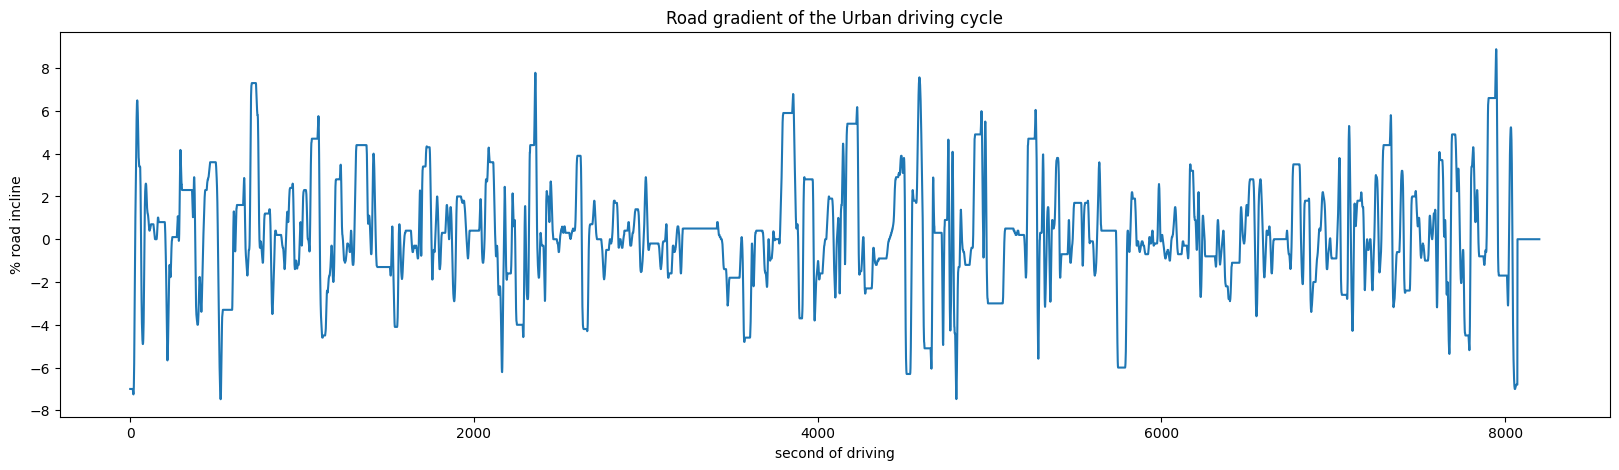

In [7]:
plt.figure(figsize=(20,5))
plt.plot(get_road_gradient(size=["9m"])[:8200,]*100)
plt.ylabel("% road incline")
plt.xlabel("second of driving")
plt.title("Road gradient of the Urban driving cycle")

## Bus lines

`carculator_bus` sets some constraints in terms of transit performance.\
The main constraints being the operation time.\
Electric city buses are, by default, required to operate **12 hours per day**, except for BEV-motion buses which are only required to operate 8 hours per day.\
Coach buses, **9 hours per day** (corresponding to the limits set by the EU legislation if only one driver is present).\

Based on this information as well as the characteristics of the driving cycles, the following typical parameters are calculated and used for city buses (principally for sizing the energy storage of BEV city buses):


**powertrain**|*unit*|**BEV-opp**|**BEV-depot**|**BEV-motion**
:-----:|:-----:|:-----:|:-----:|:-----:
parameter| | | | 
operation time|hours|12|8|12
daily distance|km|313|208|313
number of trips|unit|8|5|8
average speed|km/h|26|26|26
distance per trip|km|40|40|40
battery swap|unit|-|1|-
charging opportunity per trip|unit|1|-|-
trip distance share with catenary|ratio|-|-|0.4

* **battery swap**: allows for swapping the battery during the day. Given the current enegy density of battery packs, a swap is necessary for operating a BEV-depot buses for 20 hours. Otherwise the mass of the required battery is such that the driving mass is superior to the gross mass (considering a fully occupied bus), which is not permitted. This conidition is relaxed for future buses, as they use more energetically-dense batteries.


* **charging opportunity per trip**: the number of times BEV-opp buses are allowed to fast-charge their battery in one trip. Note that, batteries need to have a maximum depth of discharge (DoD) higher than slo-charging batteries (e.g., 40% in 2020), and cannot be charged to 100% but up to a certain state of charge (SoC) (e.g., 80% in 2020) to preserve the battery lifetime when using a fast-charger. This means that a sizing factor when dimensionsing the battery is applied (in 2020, we only use only a 50% capacity window, therefore the sizing factor is 1/0.5 = 2).


* **trip distance with catenary**: defines the share of the trip equipped with catenary lines for fast charging BEV-motion buses. Given an average speed and a given charging capacity of the overhead lines (48 kW by default), we size the battery to ensure that the bus can drive the stretches of the line not equipped with catenary lines. 28% comes from a case in Swtizerland (Givisiez).

All these parameters can be adjusted.

## Auxiliary power demand

Auxiliary power demand seems to be a serious issue for BEV buses in general.
There is an **auxiliary base demand** for operating on-traction equipment such as the air compressor, the ticket vending machines, trip information displays, steering compressor, etc. But there is also the **HVAC power demand**, which takes care of heating and cooling the bus. Finally, there an adittional power demand for BEV buses, that of the **battery management system**, which prevents the battery from overheating or overcooling.

### Auxiliary base power demand

Includes lightning, passenger information systems, ticket vending machine, charging of 24V onboard batteries, air compressor and hydraulic pump.
It usually varies between 2 and 7 kW according to this [study](https://www.sciencedirect.com/science/article/pii/S0360544218324307#bib41). However, not all devices are used constantly. This [study](https://www.cambridge.org/core/journals/design-science/article/design-of-urban-electric-bus-systems/1C0E4AA05F6E1FBF8A545E13F6A8D2DE) also confirms an auxiliary power base demand of 7.25 kW, although, they also say that it is not constnatly used. For lack of any better data at the moment, we use the following:

* for midibuses: a constant 2.25 kW demand
* for all other city buses: a constant 5 kW demand
* for all coach buses: a constant 3.5 kW demand (we assume here a reduced demand because of less sterring, less frequent door openings, no ticket vending machine, etc.)

Probably needs to be investigated further.

### Battery management system power demand

According to this [study](https://www.cambridge.org/core/journals/design-science/article/design-of-urban-electric-bus-systems/1C0E4AA05F6E1FBF8A545E13F6A8D2DE), the battery management system requires 2.75 kW on hot summer days to cool the battery down, and 0.5 kW on cold winter days to keep it warm. We use such values when the ambient temperature is above 20 degrees Celsius and below 5 degrees Celsius, respectively.

### HVAC power demand

Estimating heating and cooling need is a complicated matter. Unfortunately, it is also an important one for BEV buses.\

We use a simplified approach here. The following relation between HVAC power draw and ambient temperature from this [study](https://www.sciencedirect.com/science/article/pii/S0360544218324307#bib41) is used, which was based on a 24 kW HVAC system fitted on a 12m city bus in Finland.


Text(0.5, 0, 'Outdoor temperature [C]')

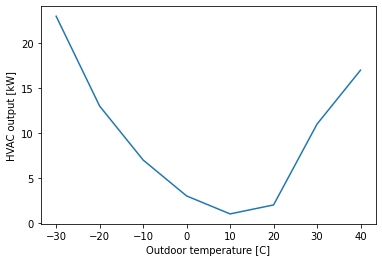

In [4]:
import numpy as np
import matplotlib.pyplot as plt
amb_temp = np.array([-30, -20, -10, 0, 10, 20, 30, 40])
pct_power_HVAC = np.array([23, 13, 7, 3, 1, 2, 11, 17])
plt.plot(amb_temp, pct_power_HVAC)
plt.ylabel("HVAC output [kW]")
plt.xlabel("Outdoor temperature [C]")

The HVAC system is sized according to the bus size (from 10 kW for the midibus, to 24 kW for the double-deck or articulated buses).\
We adapt this curve to the different bus sizes using the power load-to-max HVAC power ratio depicted above.

For BEV-buses, the HVAC is fitted with a heat pump, with the following CoP:
* 2.3 for heating
* 1.3 for cooling

For ICE buses, a PTC heater is used to provide heat (it is assumed that the excess heat from the engine is not sufficient to warm the passengers cabin to a comfortable temperature) with an efficiency of **95%**, and a compressor-based AC **80%** efficient powered by the mechanical alternator of the vehicle supplies the cooling power demand.

Furthermore, we apply a 80% reduction factor for coach buses. **Although we do not have data to confirm this**, it is very likely that coach buses have lower HVAC power requirements, as they do not open doors that frequently, and are generally better insulated (notably through the use of double-glazed windows). Hence, we assume coach buses have an overall HVAC power requirement **20%** lower than city buses.

To be investigated further.

Hence, in terms of energy consumption along the driving cycle, function of the ambient temperature, the results are presented below.

In [1]:
from carculator_bus import *
import numpy as np
bip = BusInputParameters() 
bip.static()
dcts, array = fill_xarray_from_input_parameters(
    bip, 
    scope={"size": ["13m-city", "13m-coach"],
    "powertrain": ["BEV-depot", "ICEV-d"],
    "year":[2020]}
)
params=[
    "motive energy",
    "auxiliary energy",
    "battery cooling energy",
    "battery heating energy",
    "cooling energy",
    "heating energy",
]

res = []

for temp in range(-20, 40, 5):
    bm = BusModel(array, country="CH", ambient_temperature=temp)
    bm.set_all()
    
    for pwt in bm.energy.powertrain.values:
        for s in bm.energy.coords["size"].values:
            for y in bm.energy.year.values:
                distance = bm.energy.sel(parameter="velocity", year=y, powertrain=pwt, size=s).sum(dim="second") / 1000
                energy = bm.energy.sel(year=y, powertrain=pwt, size=s, value=0, parameter=params).sum(dim="second").values
                d = [temp, pwt, s, y]
                d.extend((energy / distance.T.values).tolist())
                res.append(d)

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\main_env\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Finding solutions for buses...
8129
17834
driving time [[[[ 8129. 17834.]]]]
8129
17834
driving time [[[[ 8129. 17834.]]]]
8129
17834
driving time [[[[ 8129. 17834.]]]]
8129
17834
driving time [[[[ 8129. 17834.]]]]

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+-----------------+----------+-----------+
|                 | 13m-city | 13m-coach |
+-----------------+----------+-----------+
| BEV-depot, 2020 |   10.0   |    21.0   |
|   ICEV-d, 2020  |   10.0   |    21.0   |
+-----------------+----------+-----------+
Finding solutions for buses...
8129
17834
driving time [[[[ 8129. 17834.]]]]
8129
17834
driving time [[[[ 8129. 17834.]]]]

Number of passengers on board
'X' BEV with driving mass when fully occup

In [2]:
import pandas as pd
df = pd.DataFrame(res, columns=["temp", "powertrain", "size", "year"] + params)

Here below is the comparison of the different auxiliary energy components between a 13m BEV and ICEV-d bus, for city and intercity use, function of the outdoor temperature.

**Note**: the 13m BEV intercity bus is only shown for this purpose, as the model would not validate such bus (at least, not in 2020, as the battery would make the bus heavier than its permitted gross mass when fully occupied).

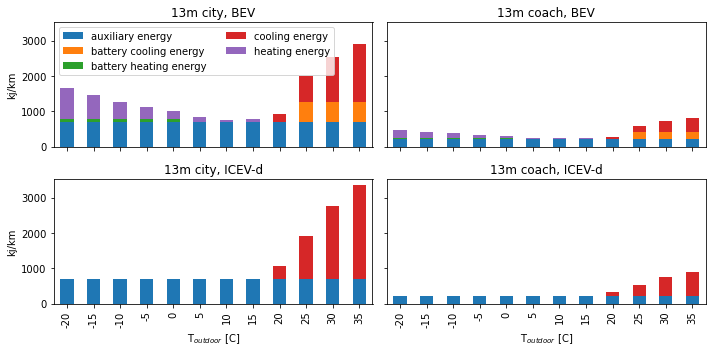

In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(10, 5))

df.loc[
    (df["powertrain"]=="BEV-depot")
    &(df["size"]=="13m-city")
].drop(["year", "motive energy"], axis=1).groupby(["powertrain", "size", "temp"]).sum().plot(
    kind="bar",
    stacked=True,
    ax=axs[0, 0]
)
axs[0, 0].set_title('13m city, BEV')
axs[0, 0].set_ylabel("kj/km")

df.loc[
    (df["powertrain"]=="BEV-depot")
    &(df["size"]=="13m-coach")
].drop(["year", "motive energy"], axis=1).groupby(["powertrain", "size", "temp"]).sum().plot(
    kind="bar",
    stacked=True,
    ax=axs[0, 1]
)
axs[0, 1].set_title('13m coach, BEV')
axs[0, 1].set_ylabel("kj/km")

df.loc[
    (df["powertrain"]=="ICEV-d")
    &(df["size"]=="13m-city")
].drop(["year", "motive energy"], axis=1).groupby(["powertrain", "size", "temp"]).sum().plot(
    kind="bar",
    stacked=True,
    ax=axs[1, 0]
)
axs[1, 0].set_title('13m city, ICEV-d')
axs[1, 0].set_ylabel("kj/km")
axs[1, 0].set_xlabel("T$_{outdoor}$ [C]")

df.loc[
    (df["powertrain"]=="ICEV-d")
    &(df["size"]=="13m-coach")
].drop(["year", "motive energy"], axis=1).groupby(["powertrain", "size", "temp"]).sum().plot(
    kind="bar",
    stacked=True,
    ax=axs[1, 1]
)
axs[1, 1].set_title('13m coach, ICEV-d')
axs[1, 1].set_ylabel("kj/km")
axs[1, 1].set_xlabel("T$_{outdoor}$ [C]")

axs[0, 0].legend([
    "auxiliary energy",
    "battery cooling energy",
    "battery heating energy",
    "cooling energy",
    "heating energy",
], ncol=2)

axs[0, 1].legend().remove()
axs[1, 0].legend().remove()
axs[1, 1].legend().remove()

axs[1, 0].set_xticklabels(range(-20, 40, 5))
axs[1, 1].set_xticklabels(range(-20, 40, 5))
plt.tight_layout()

**First remark**: because the auxiliary energy is dependent on time and not on distance, it is more of an issue for city buses when normalized per km, as they have an average speed 2 to 3 times as low as that of a coach bus.

**Second remark**: a bus does not constantly operate at -20 C or +30 C. This is why we have pre-set monthly average temperature series for more than a 130 capital cities.

In [1]:
from carculator_bus import *
import numpy as np
bip = BusInputParameters() 
bip.static()
dcts, array = fill_xarray_from_input_parameters(
    bip, 
    scope={"size": ["13m-city", "13m-coach"],
    "powertrain": ["BEV-depot", "ICEV-d"],
    "year":[2020]}
)
params=[
    "motive energy",
    "auxiliary energy",
    "battery cooling energy",
    "battery heating energy",
    "cooling energy",
    "heating energy",
]

res = list()

for country in ["MN", "CH", "FR", "JM"]:
    bm = BusModel(array, country=country)
    bm.set_all()
    for pwt in bm.energy.powertrain.values:
        for s in bm.energy.coords["size"].values:
            for y in bm.energy.year.values:
                distance = bm.energy.sel(parameter="velocity", year=y, powertrain=pwt, size=s).sum(dim="second") / 1000
                energy = bm.energy.sel(year=y, powertrain=pwt, size=s, value=0, parameter=params).sum(dim="second").values
                d = [country, pwt, s, y]
                d.extend((energy / distance.T.values).tolist())
                res.append(d)

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\main_env\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Finding solutions for buses...
MN
[-16. -11.  -2.   6.  15.  20.  21.  20.  14.   6.  -6. -13.]
[20 20 20 20 20 20 20 20 20 20 20 20]
MN
[-16. -11.  -2.   6.  15.  20.  21.  20.  14.   6.  -6. -13.]
[20 20 20 20 20 20 20 20 20 20 20 20]
MN
[-16. -11.  -2.   6.  15.  20.  21.  20.  14.   6.  -6. -13.]
[20 20 20 20 20 20 20 20 20 20 20 20]
MN
[-16. -11.  -2.   6.  15.  20.  21.  20.  14.   6.  -6. -13.]
[20 20 20 20 20 20 20 20 20 20 20 20]

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+-----------------+----------+-----------+
|                 | 13m-city | 13m-coach |
+-----------------+----------+-----------+
| BEV-depot, 2020 |   10.0   |    21.0   |
|   ICEV-d, 2020  |   10.0   |    21.0   |
+----------

In [2]:
%matplotlib inline

In [19]:
import pandas as pd
df_locs = pd.DataFrame(res, columns=["country", "powertrain", "size", "year"] + params)

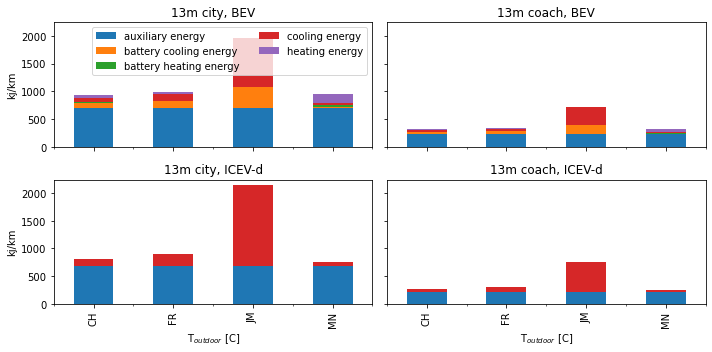

In [20]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(10, 5))

countries = df_locs.loc[
    (df_locs["powertrain"]=="BEV-depot")
    &(df_locs["size"]=="13m-city")
].drop(["year", "motive energy"], axis=1).groupby(["powertrain", "size", "country"]).sum().index.get_level_values(2).tolist()

df_locs.loc[
    (df_locs["powertrain"]=="BEV-depot")
    &(df_locs["size"]=="13m-city")
].drop(["year", "motive energy"], axis=1).groupby(["powertrain", "size", "country"]).sum().plot(
    kind="bar",
    stacked=True,
    ax=axs[0, 0]
)
axs[0, 0].set_title('13m city, BEV')
axs[0, 0].set_ylabel("kj/km")

df_locs.loc[
    (df_locs["powertrain"]=="BEV-depot")
    &(df_locs["size"]=="13m-coach")
].drop(["year", "motive energy"], axis=1).groupby(["powertrain", "size", "country"]).sum().plot(
    kind="bar",
    stacked=True,
    ax=axs[0, 1]
)
axs[0, 1].set_title('13m coach, BEV')
axs[0, 1].set_ylabel("kj/km")

df_locs.loc[
    (df_locs["powertrain"]=="ICEV-d")
    &(df_locs["size"]=="13m-city")
].drop(["year", "motive energy"], axis=1).groupby(["powertrain", "size", "country"]).sum().plot(
    kind="bar",
    stacked=True,
    ax=axs[1, 0]
)
axs[1, 0].set_title('13m city, ICEV-d')
axs[1, 0].set_ylabel("kj/km")
axs[1, 0].set_xlabel("T$_{outdoor}$ [C]")

df_locs.loc[
    (df_locs["powertrain"]=="ICEV-d")
    &(df_locs["size"]=="13m-coach")
].drop(["year", "motive energy"], axis=1).groupby(["powertrain", "size", "country"]).sum().plot(
    kind="bar",
    stacked=True,
    ax=axs[1, 1]
)
axs[1, 1].set_title('13m coach, ICEV-d')
axs[1, 1].set_ylabel("kj/km")
axs[1, 1].set_xlabel("T$_{outdoor}$ [C]")

axs[0, 0].legend([
    "auxiliary energy",
    "battery cooling energy",
    "battery heating energy",
    "cooling energy",
    "heating energy",
], ncol=2)

axs[0, 1].legend().remove()
axs[1, 0].legend().remove()
axs[1, 1].legend().remove()

axs[1, 0].set_xticklabels(countries)
axs[1, 1].set_xticklabels(countries)
plt.tight_layout()

But does this matter? If we look at it consider also the motive energy:

In [46]:
df.loc[:, "motive energy":] = df.loc[:, "motive energy":].divide(df.loc[:, "motive energy":].sum(1).values, 0)

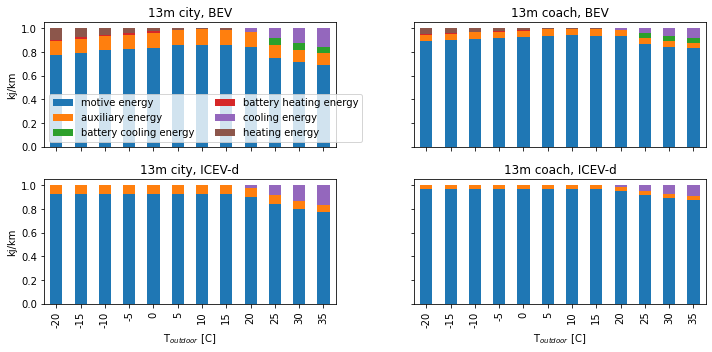

In [47]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(10, 5))

df.loc[
    (df["powertrain"]=="BEV-depot")
    &(df["size"]=="13m-city")
].drop(["year"], axis=1).groupby(["powertrain", "size", "temp"]).sum().plot(
    kind="bar",
    stacked=True,
    ax=axs[0, 0]
)
axs[0, 0].set_title('13m city, BEV')
axs[0, 0].set_ylabel("kj/km")

df.loc[
    (df["powertrain"]=="BEV-depot")
    &(df["size"]=="13m-coach")
].drop(["year"], axis=1).groupby(["powertrain", "size", "temp"]).sum().plot(
    kind="bar",
    stacked=True,
    ax=axs[0, 1]
)
axs[0, 1].set_title('13m coach, BEV')
axs[0, 1].set_ylabel("kj/km")

df.loc[
    (df["powertrain"]=="ICEV-d")
    &(df["size"]=="13m-city")
].drop(["year"], axis=1).groupby(["powertrain", "size", "temp"]).sum().plot(
    kind="bar",
    stacked=True,
    ax=axs[1, 0]
)
axs[1, 0].set_title('13m city, ICEV-d')
axs[1, 0].set_ylabel("kj/km")
axs[1, 0].set_xlabel("T$_{outdoor}$ [C]")

df.loc[
    (df["powertrain"]=="ICEV-d")
    &(df["size"]=="13m-coach")
].drop(["year"], axis=1).groupby(["powertrain", "size", "temp"]).sum().plot(
    kind="bar",
    stacked=True,
    ax=axs[1, 1]
)
axs[1, 1].set_title('13m coach, ICEV-d')
axs[1, 1].set_ylabel("kj/km")
axs[1, 1].set_xlabel("T$_{outdoor}$ [C]")

axs[0, 0].legend([
    "motive energy",
    "auxiliary energy",
    "battery cooling energy",
    "battery heating energy",
    "cooling energy",
    "heating energy",
], ncol=2)

axs[0, 1].legend().remove()
axs[1, 0].legend().remove()
axs[1, 1].legend().remove()

axs[1, 0].set_xticklabels(range(-20, 40, 5))
axs[1, 1].set_xticklabels(range(-20, 40, 5))
plt.tight_layout()

Then it seems that this is indeed an issue, but **mostly for urban electric buses**, and to a lesser extent, inter-city electric buses (provided they are a viable option). It seems **auxiliary energy represents 25% of the TtW energy** consumption in normal conidtions, and **going up to 30%** in cold and hot conditions, respectively. **This is as much energy not available for traction purpose.**

## Traction energy

We use VECTO to calibrate the engine and transmission efficiency of diesel trucks. As for the truck model, we use the relation between efficiency and the power load-to-max-power ratio.

A calibration exercise with VECTO for the diesel-powered 13m city bus is shown below.

In [1]:
import pandas as pd
from carculator_bus import *

bip = BusInputParameters() 
bip.static()
scope = {"size":["13m-city"], "powertrain":["ICEV-d"]}
dcts, array = fill_xarray_from_input_parameters(bip, scope=scope)

# we model the bus empty
# and with the same power-to-mass ratio as used in VECTO
array.loc[dict(parameter="average passengers")] = 0
#array.loc[dict(parameter="auxiliary power base demand")] = 0
array.loc[dict(parameter="power to mass ratio", size="13m-city", powertrain=["ICEV-d"])] = 175000/11250

bm = BusModel(array)
bm.set_all()

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\main_env\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+--------------+----------+
|              | 13m-city |
+--------------+----------+
| ICEV-d, 2000 |   0.0    |
| ICEV-d, 2010 |   0.0    |
| ICEV-d, 2020 |   0.0    |
| ICEV-d, 2030 |   0.0*   |
| ICEV-d, 2040 |   0.0*   |
| ICEV-d, 2050 |   0.0*   |
+--------------+----------+


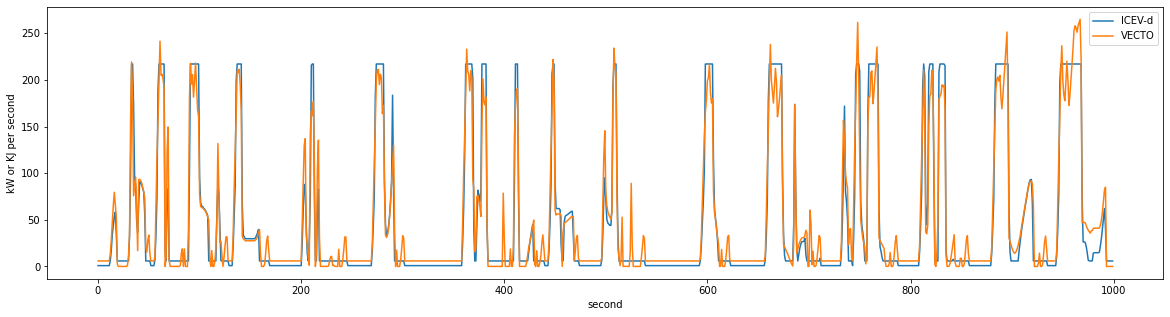

In [2]:
import matplotlib.pyplot as plt
# fetch the VECTO simulation file for the 13m city bus
fp =  r'C:\Users\sacchi_r\Documents\GitHub\carculator_bus\dev\13m-city_Urban_1Hz.vmod'
df_13 = pd.read_csv(fp,sep=",", header=1)

# convert the power required into energy conusmption
# 42 MJ/kg diesel
df_13["fuel power [kW]"] = df_13["FC-Final [g/h]"]/3600*42

plt.figure(figsize=(20,5))

plt.plot(bm.energy.sel(powertrain=["ICEV-d"],
                       size="13m-city",
                       year=2020,
                       value=0,
                       second=range(0, 1000),
                       parameter=["motive energy", "auxiliary energy", "cooling energy", "heating energy"]).sum(dim="parameter")\
    .to_dataframe("val").unstack()["val"], label="ICEV-d")


plt.plot(df_13["fuel power [kW]"][0:1000], label="VECTO")

plt.ylabel("kW or KJ per second")
plt.xlabel("second")

plt.legend()

In [3]:
(bm.energy.sel(powertrain=["ICEV-d"],
                       size="13m-city",
                       year=2020,
                       value=0,
                       parameter=["motive energy", "auxiliary energy", "cooling energy", "heating energy"]
              ).sum(dim=["second", "parameter"])/1000 / (df_13["fuel power [kW]"].sum()/1000)).values

array([0.99555408])

The difference is inferior to 1%. Given the simplification of the approach, it is reasonnable IMO.

For ICEV-g trucks, we use a penalty factor of 19% relative to the diesel engine up to 2020, porgessively decreasing over time to become null by 2050.

For electric powertrains, we use the same power load/nominal power relation to figre out teh engine and transmission efficiencies, from this study: https://www.sciencedirect.com/science/article/pii/S0306261920309752

**Note**: BEV-motion buses do not have energy storage capabilities before 2020. However, in reality, they might reinject the electricity surplus to the grid via the catenary cables to be reused by other nearby trolleybuses -- which maybe, from an LCA point of view, should be considered as some sort of energy storage, and therefore be deducted from the traction energy, therefore we do so.

## Energy storage

The sizing of energy storage for BEV buses is sensitive to a few parameters, such as those mentioned a bit earlier (battery swap, charging opportunity by trip, share of the line equipped with catenary, and of course, the specific energy density of cells).

**Note 1**: technically-speaking `carculator_bus` will model all buses. But if some of the BEV buses have an energy storage mass leading to a driving mass when fully occupied superior to the maximum allowed gross mass, such vehicles will not be processed for LCIA quantification.

**Note 2**: for BEV-depot buses, while the number of daily battery swaps decreased the needed size and capacity of the battery to fulfill the operation time, it also means that several batteries will have to be purchased for a single bus. This is reflected in the vehicle's inventory.

**Note 3**: overnight charging vehicles (BEV-depot) use a **Li-NMC battery** by default, while opportunity and in motion charging vehicles (BEV-opp, BEV-motion) use a **Li-LTO** battery. According to this [study](https://www.cambridge.org/core/journals/design-science/article/design-of-urban-electric-bus-systems/1C0E4AA05F6E1FBF8A545E13F6A8D2DE), Li-LTO batteries are better suited for fast charging in general and fast-charging under exteme temperature in particular. However, the user can choose among several chemistry options. `carculator_bus` will determine the battery lifetime (and the need for replacement) based on the battery expected cycle life, based on values given by the same study as well as [this one](https://iopscience.iop.org/article/10.1149/1945-7111/abae37):

 -|**unit**|**LFP**|**LTO**|**NMC**|**NCA**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
Cell voltage|V|3.2|2.3|3.6|3.6
Cell capacity|Ah|14-45|20-65|37-53|
Energy density|Wh/kg cell|115-146|76-77|175-200|200-230
Charge rate| |1C|4C-10C|2C-3C|2C-3C
Cycle life (at 100% DoD)|unit|7000|7000+|2000+|1000

Given the energy consumption of the vehicle and the required battery capacity, `carculator_bus` calculates the number of charging cycles needed and the resulting number of battery replacements, given the cycle life of the chemistry used.

With the default cycle life values, there is a difference in lifetime across chemistries that is explained by the fact that LTO batteries are fast-charged at a higher SoC (about 40-50%, against 10-20% for NMC batteries) and up to a lower SoC (about 80-90%), which also warrants an important sizing factor. **In other words, using default cycle life values results in replacing the NMC battery of the BEV-depot bus once during the vehicle's lifetime (after 600,000 km), while the NCA batteries replaced twice.**.


**Note 2**: here are the specific cell energy density values considered:

**Energy density [kWh/kg cell]**|**2020**|**2030**|**2040**|**2050**
:-----:|:-----:|:-----:|:-----:|:-----:
NMC|0.2|0.3|0.4|0.5
NCA|0.23|0.3|0.4|0.5
LFP|0.08|0.11|0.11|0.15
LTO|0.075|0.08|0.09|0.1

**Note 3**: here are the battery sizing factors considered for fast-charging batteries:

**Sinzing factor**|**2020**|**2030**|**2040**|**2050**
:-----:|:-----:|:-----:|:-----:|:-----:
Maximum SoC|90%|90%|90%|90%
Maximum DoD|40%|35%|30%|25%
Sizing factor|2|1.8|1.66|1.5


We can display the effect of chemistry on the number of battery replacements, the required battery capacity as well as the battery mass, for each type of BEV bus.

In [4]:
import pandas as pd
from carculator_bus import *

bip = BusInputParameters() 
bip.static()

l_res = []

batt_tech = ["NMC-111", "NCA", "LFP", "LTO"]

for tech in batt_tech:
    energy_storage = {"electric": {"BEV-opp": tech, "BEV-depot": tech, "BEV-motion": tech}}
    dcts, array = fill_xarray_from_input_parameters(bip, scope={
            "powertrain": ["BEV-depot", "BEV-opp", "BEV-motion"],
            "year":[2020],
            "size":["13m-city"]})
    bm = BusModel(array, energy_storage=energy_storage)
    bm.set_all()
    
    for pt in bm.array.powertrain.values:
        for p in ["battery lifetime replacements", "energy battery mass", "electric energy stored"]:
            l_res.append([
                pt, tech, p, bm.array.sel(parameter=p, powertrain=pt, value=0, year=2020).values.tolist()[0]
            ])


Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+------------------+----------+
|                  | 13m-city |
+------------------+----------+
| BEV-depot, 2020  |   10.0   |
|  BEV-opp, 2020   |   10.0   |
| BEV-motion, 2020 |   10.0   |
+------------------+----------+
Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+------------------+----------+
|                  |

In [5]:
df = pd.DataFrame(l_res, columns=["powertrain", "chemistry", "parameter", "value"]).groupby("parameter")

C:\Users\sacchi_r\AppData\Local\Temp/ipykernel_21496/1103120349.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


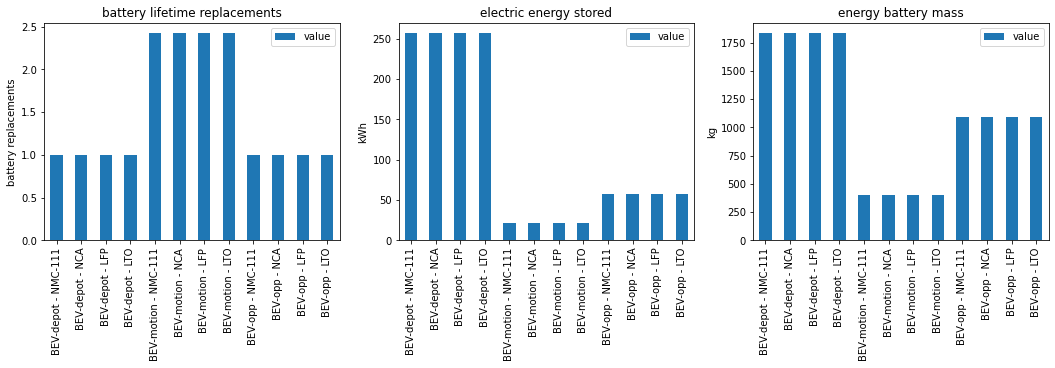

In [6]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(18,4), 
                        nrows=1, ncols=3,     # fix as above
                        gridspec_kw=dict(hspace=0.4)) # Much control of gridspec

targets = zip(df.groups.keys(), axs.flatten())
for i, (key, ax) in enumerate(targets):
    df.get_group(key).sort_values(by="powertrain").plot(ax=ax, kind="bar")
    i = df.get_group(key).sort_values(by="powertrain")["powertrain"] + " - " + df.get_group(key).sort_values(by="powertrain")["chemistry"]
    ax.set_xticklabels(i)
    ax.set_title(key)
ax.legend()

axs[0].set_ylabel("battery replacements")
axs[1].set_ylabel("kWh")
axs[2].set_ylabel("kg")
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
from carculator_bus import *

res = list()

for i in [
    # operation time, charging opportunity, share of the line with catenary
    (16, 0, 0.1),
    (14, 1, 0.2),
    (12, 2, 0.3),
    (10, 3, 0.4),
    (8, 4, 0.5),
    ]:
    
    bip = BusInputParameters() 
    bip.static()
    dcts, array = fill_xarray_from_input_parameters(bip, scope={
        "powertrain": ["BEV-depot", "BEV-opp", "BEV-motion"],
        "year":[2020],
        "size":["13m-city"]}
                                                   )
    bm = BusModel(array)

    array.loc[dict(parameter="operation time", powertrain="BEV-depot")] = i[0]
    array.loc[dict(parameter="charging opportunity per trip", powertrain="BEV-opp")] = i[1]
    array.loc[dict(parameter="trip distance share with catenary", powertrain="BEV-motion")] = i[2]
    bm.set_all()
    
    res.append(bm.array.sel(powertrain=["BEV-depot", "BEV-opp", "BEV-motion"], size="13m-city", year=2020, value=0,
                parameter=["energy battery mass", "electric energy stored"]).values)

Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+------------------+----------+
|                  | 13m-city |
+------------------+----------+
| BEV-depot, 2020  |   10.0   |
|  BEV-opp, 2020   |   10.0   |
| BEV-motion, 2020 |   10.0   |
+------------------+----------+
Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+------------------+----------+
|                  |

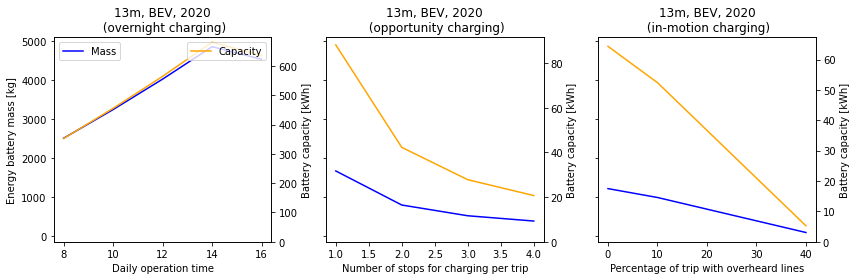

In [8]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(12, 4))

data = np.array(res)

axs[0].plot(np.arange(16, 6, -2),data[:, 0, 0], label="Mass", c="blue")
ax2 = axs[0].twinx()
ax2.plot(np.arange(16, 6, -2),data[:, 0, 1], label="Capacity", c="orange")
ax2.set_ylabel("Battery capacity [kWh]")
axs[0].set_xlabel("Daily operation time")
axs[0].set_ylabel("Energy battery mass [kg]")
axs[0].set_title("13m, BEV, 2020\n (overnight charging)")
ax2.legend(loc="upper right")
ax2.set_ylim(0, )
axs[0].legend(loc="upper left")

axs[1].plot(range(0, 5),data[:, 1, 0], label="Mass", c="blue")
ax3 = axs[1].twinx()
ax3.plot(range(0, 5),data[:, 1, 1], label="Capacity", c="orange")
ax3.set_ylabel("Battery capacity [kWh]")
ax3.set_ylim(0, )
axs[1].set_xlabel("Number of stops for charging per trip")
axs[1].set_title("13m, BEV, 2020\n (opportunity charging)")


axs[2].plot(np.arange(0, 50, 10), data[:, 2, 0], label="Mass", c="blue")
ax4 = axs[2].twinx()
ax4.plot(np.arange(0, 50, 10), data[:, 2, 1],  label="Capacity", c="orange")
ax4.set_ylabel("Battery capacity [kWh]")
ax4.set_ylim(0, )
axs[2].set_xlabel("Percentage of trip with overheard lines")
axs[2].set_title("13m, BEV, 2020\n (in-motion charging)")

plt.tight_layout()

The **daily operation time** is very important for the sizing of overnight-charging buses. In most instances, such bus would drive 7-8 hours per day. In some places, they have battery swap systems, not considered here.

As for BEV-opp, the benefits of adding charging stops is marginally decreasing after 2.

For in motion-charging buses, the relation between the share of the distance equipped with catenary and the energy storage requirement is quite linear. A 48kW/400 V catenary system is used here, with characteristics based on this [study](http://publish.illinois.edu/yuecaouiuc/files/2016/04/07459224.pdf). In reality, it is very probable that the charging rate depends on the SoC of the battery (decreasing as the SoC increases). With a default value of 40% of the trip equipped with catenary, taken from [this white paper](http://www.rupprecht-consult.eu/uploads/tx_rupprecht/FINAL_UITP_brochure_trolleybus_DIGITAL_mail.pdf), it means the bus is in contact with the overhead lines about 55 seconds per km, effectively charging the battery by 0.7 kWh during that time (excluding the losses). Hence, the battery needs to be about 10-15 kWh big to cover the streched of line not equipped with the overhead lines -- also considering the sizing factor.

## Finding solutions

Very much like `carculator_truck`, `carculator_bus` will iterate until:
* the change in curb mass of the vehicles between two iteration is below 1%
* the hybridization of the powertrain of ICEV buses stops being beneficial

all while considering the **following constraints**:
* for **all buses**, the driving mass when fully occupied can not be superior to the gross mass of the vehicle (this is specifically relevant for BEV buses)
* for **ICE buses**, there are emissions reduction target (-25% in 2025 and -30% in 2030, relative to 2020)
*  **coach buses** cannot be considered for opportunity and in-motion charging strategies.
* for **BEV-depot** buses, the capacity of the battery must be so that it gives enough time to charge it overnight to be ready for the next shift. A solution to this is to allow a number of battery swaps during the day (but which, of course, increases the burden of energy storage as multiple batteries are allocated to one bus).

### Comparison for a 13m city bus, across powertrains

In [1]:
import pandas as pd
from carculator_bus import *
bip = BusInputParameters() 
bip.static()
dcts, array = fill_xarray_from_input_parameters(bip)
bm = BusModel(array)
bm.set_all()

df = bm.array.sel(size="13m-city", value=0, year=[2020, 2030, 2040, 2050], parameter=[
    "driving mass",
    "TtW energy",
    "TtW efficiency",
    "electric energy stored",
    "power",
    "combustion power share"
]).to_dataframe("val").unstack(0, 1)["val"]

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\main_env\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+------------------+----------+-----------------+-----------+------------------+-------+------+
|                  | 13m-city | 13m-city-double | 13m-coach | 13m-coach-double |  18m  |  9m  |
+------------------+----------+-----------------+-----------+------------------+-------+------+
| BEV-depot, 2000  |   10.0   |       13.0      |    21.0   |       26.0       |  19.0 | 5.0  |
| BEV-depot, 2010  |   10.0   |       13.0      |    21.0   |       26.0       |  19.0 | 5.0  |
| BEV-depot, 2020  |   10.0   |       13.0      |    21.0   |       26.0       |  19.0 | 5.0  |
| BEV-depot, 2030  |   10.0   |       13.0      |    21.0   | 

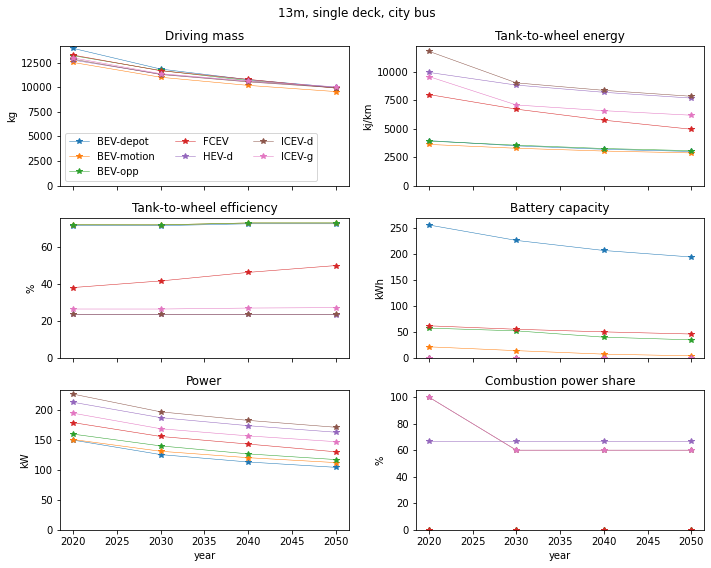

In [2]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(10, 8))

df.loc["driving mass"].plot(ax=axs[0, 0], linewidth=.5, marker="*")
axs[0, 0].set_title('Driving mass')
axs[0, 0].set_ylabel("kg")
axs[0, 0].legend(ncol=3)
axs[0, 0].set_ylim(0, )

df.loc["TtW energy"].plot(ax=axs[0, 1], linewidth=.5, marker="*")
axs[0, 1].set_title('Tank-to-wheel energy')
axs[0, 1].set_ylabel("kj/km")
axs[0, 1].get_legend().remove()
axs[0, 1].set_ylim(0, )

(df.loc["TtW efficiency"]*100).plot(ax=axs[1, 0], linewidth=.5, marker="*")
axs[1, 0].set_title('Tank-to-wheel efficiency')
axs[1, 0].set_ylabel("%")
axs[1, 0].get_legend().remove()
axs[1, 0].set_ylim(0, )

df.loc["electric energy stored"].plot(ax=axs[1, 1], linewidth=.5, marker="*")
axs[1, 1].set_title('Battery capacity')
axs[1, 1].set_ylabel("kWh")
axs[1, 1].get_legend().remove()
axs[1, 1].set_ylim(0, )

df.loc["power"].plot(ax=axs[2, 0], linewidth=.5, marker="*")
axs[2, 0].set_title('Power')
axs[2, 0].set_ylabel("kW")
axs[2, 0].get_legend().remove()
axs[2, 0].set_ylim(0, )

(df.loc["combustion power share"]*100).plot(ax=axs[2, 1], linewidth=.5, marker="*")
axs[2, 1].set_title('Combustion power share')
axs[2, 1].set_ylabel("%")
axs[2, 1].get_legend().remove()
axs[2, 1].set_ylim(0, )

plt.suptitle('13m, single deck, city bus')

plt.tight_layout()

### Comparison for a diesel powertrain, across bus types

In [4]:
import pandas as pd
from carculator_bus import *
bip = BusInputParameters() 
bip.static()
dcts, array = fill_xarray_from_input_parameters(bip, scope={"powertrain": ["ICEV-d"]})

bm = BusModel(array)
bm.set_all()

df = bm.array.sel(value=0, year=[2020, 2030, 2040, 2050], powertrain="ICEV-d", parameter=[
    "driving mass",
    "TtW energy",
    "TtW efficiency",
    "electric energy stored",
    "power",
    "combustion power share"
]).to_dataframe("val").unstack(0, 1)["val"]

Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+--------------+----------+-----------------+-----------+------------------+-------+------+
|              | 13m-city | 13m-city-double | 13m-coach | 13m-coach-double |  18m  |  9m  |
+--------------+----------+-----------------+-----------+------------------+-------+------+
| ICEV-d, 2000 |   10.0   |       13.0      |    21.0   |       26.0       |  19.0 | 5.0  |
| ICEV-d, 2010 |   10.0   |       13.0      |    21.0   |       26.0       |  19.0 | 5.0  |
| ICEV-d, 2020 |   10.0   |       13.0      |    21.0   |       26.0       |  19.0 | 5.0  |
| ICEV-d, 2030 |  10.0*   |      13.0*      |   21.0*   |      26.0*       | 19.0* | 5

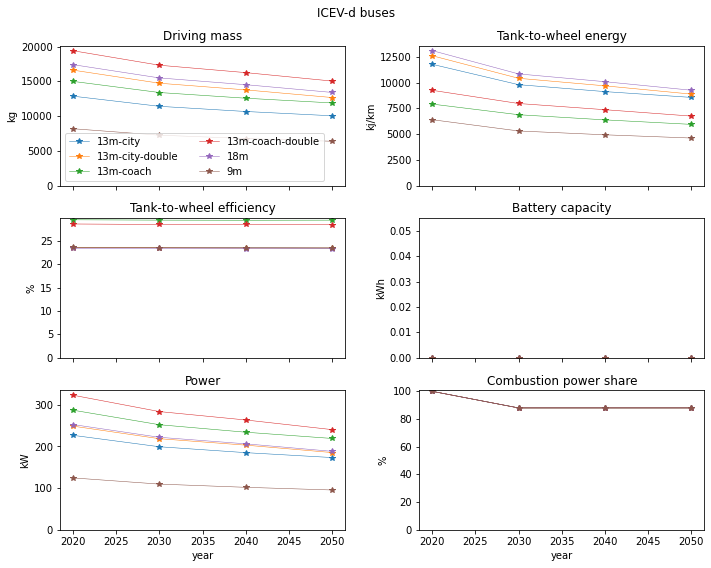

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(10, 8))


df.loc["driving mass"].plot(ax=axs[0, 0], linewidth=.5, marker="*")
axs[0, 0].set_title('Driving mass')
axs[0, 0].set_ylabel("kg")
axs[0, 0].legend(ncol=2)
axs[0, 0].set_ylim(0, )

df.loc["TtW energy"].plot(ax=axs[0, 1], linewidth=.5, marker="*")
axs[0, 1].set_title('Tank-to-wheel energy')
axs[0, 1].set_ylabel("kj/km")
axs[0, 1].get_legend().remove()
axs[0, 1].set_ylim(0, )

(df.loc["TtW efficiency"]*100).plot(ax=axs[1, 0], linewidth=.5, marker="*")
axs[1, 0].set_title('Tank-to-wheel efficiency')
axs[1, 0].set_ylabel("%")
axs[1, 0].get_legend().remove()
axs[1, 0].set_ylim(0, )

df.loc["electric energy stored"].plot(ax=axs[1, 1], linewidth=.5, marker="*")
axs[1, 1].set_title('Battery capacity')
axs[1, 1].set_ylabel("kWh")
axs[1, 1].get_legend().remove()
axs[1, 1].set_ylim(0, )

df.loc["power"].plot(ax=axs[2, 0], linewidth=.5, marker="*")
axs[2, 0].set_title('Power')
axs[2, 0].set_ylabel("kW")
axs[2, 0].get_legend().remove()
axs[2, 0].set_ylim(0, )

(df.loc["combustion power share"]*100).plot(ax=axs[2, 1], linewidth=.5, marker="*")
axs[2, 1].set_title('Combustion power share')
axs[2, 1].set_ylabel("%")
axs[2, 1].get_legend().remove()
axs[2, 1].set_ylim(0, )

plt.suptitle('ICEV-d buses')

plt.tight_layout()

### Comparison for opportunity charging BEV-depot buses, across bus types

In [6]:
import pandas as pd
from carculator_bus import *
bip = BusInputParameters() 
bip.static()
dcts, array = fill_xarray_from_input_parameters(bip, scope={"powertrain": ["BEV-depot"]})
bm = BusModel(array)
bm.set_all()

df = bm.array.sel(value=0, year=[2020, 2030, 2040, 2050], powertrain="BEV-depot", parameter=[
    "driving mass",
    "TtW energy",
    "TtW efficiency",
    "electric energy stored",
    "power",
    "combustion power share"
]).to_dataframe("val").unstack(0, 1)["val"]

Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+-----------------+----------+-----------------+-----------+------------------+------+-----+
|                 | 13m-city | 13m-city-double | 13m-coach | 13m-coach-double | 18m  |  9m |
+-----------------+----------+-----------------+-----------+------------------+------+-----+
| BEV-depot, 2000 |   10.0   |       13.0      |    21.0   |       26.0       | 19.0 | 5.0 |
| BEV-depot, 2010 |   10.0   |       13.0      |    21.0   |       26.0       | 19.0 | 5.0 |
| BEV-depot, 2020 |   10.0   |       13.0      |    21.0   |       26.0       | 19.0 | 5.0 |
| BEV-depot, 2030 |   10.0   |       13.0      |    21.0   |       26.0       | 

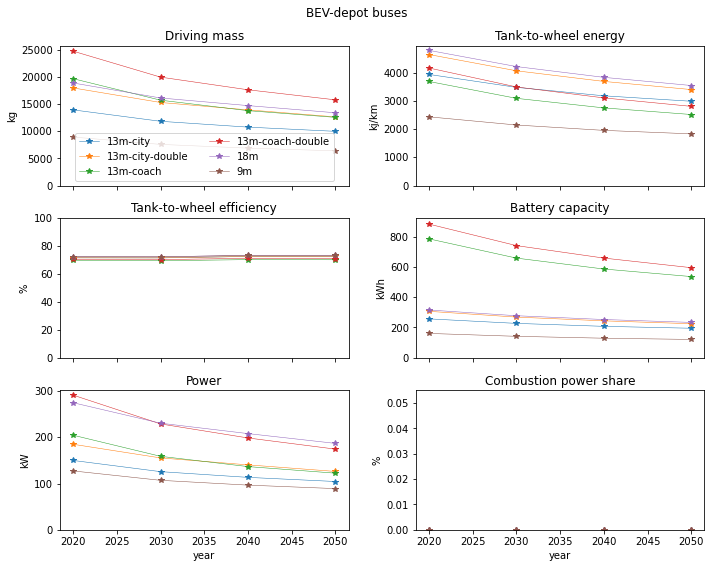

In [8]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(10, 8))

df.loc["driving mass"].plot(ax=axs[0, 0], linewidth=.5, marker="*")
axs[0, 0].set_title('Driving mass')
axs[0, 0].set_ylabel("kg")
axs[0, 0].legend(ncol=2)
axs[0, 0].set_ylim(0, )

df.loc["TtW energy"].plot(ax=axs[0, 1], linewidth=.5, marker="*")
axs[0, 1].set_title('Tank-to-wheel energy')
axs[0, 1].set_ylabel("kj/km")
axs[0, 1].get_legend().remove()
axs[0, 1].set_ylim(0, )

(df.loc["TtW efficiency"]*100).plot(ax=axs[1, 0], linewidth=.5, marker="*")
axs[1, 0].set_title('Tank-to-wheel efficiency')
axs[1, 0].set_ylabel("%")
axs[1, 0].get_legend().remove()
axs[1, 0].set_ylim(0, 100)

df.loc["electric energy stored"].plot(ax=axs[1, 1], linewidth=.5, marker="*")
axs[1, 1].set_title('Battery capacity')
axs[1, 1].set_ylabel("kWh")
axs[1, 1].get_legend().remove()
axs[1, 1].set_ylim(0, )

df.loc["power"].plot(ax=axs[2, 0], linewidth=.5, marker="*")
axs[2, 0].set_title('Power')
axs[2, 0].set_ylabel("kW")
axs[2, 0].get_legend().remove()
axs[2, 0].set_ylim(0, )

(df.loc["combustion power share"]*100).plot(ax=axs[2, 1], linewidth=.5, marker="*")
axs[2, 1].set_title('Combustion power share')
axs[2, 1].set_ylabel("%")
axs[2, 1].get_legend().remove()
axs[2, 1].set_ylim(0, )

plt.suptitle('BEV-depot buses')

plt.tight_layout()

## Chargers

We us the following charger types:
* **Level-2 charger 3-19 kW AC charger** for overnight charging vehicles (BEV-depot, PHEV-d). Inventories described in this [study](https://doi.org/10.1016/S0306-2619(01)00032-0) (although a bit old (2001), it's pretty much the only source I could find). It includes the charging stand, the charger and a storage battery. In our case, it's rather a Level-3 charger that is needed, with a charging power of about 100 kW. So we use these inventories and **scale the charger component up to 100 kW**, for which ABB gives us a mass of [1,290 kg](https://search.abb.com/library/Download.aspx?DocumentID=9AKK107991A4055&LanguageCode=en&DocumentPartId=&Action=Launch). The charger is 100% dedicated to the bus (the charger needs to continuously charge 2 to 3 batteries per day for the bus to operate), which does not leave time to charge batteries of other buses. However, the lifetime of the charger is twice as that of the bus.


* **Level-3 fast DC charger** for opportunity charging vehicles (BEV-opp). Not much about those either in the literature. We use the technical specs of ABB's 450 kW [pantograph-type bus charger](https://search.abb.com/library/Download.aspx?DocumentID=9AKK107991A4055&LanguageCode=en&DocumentPartId=&Action=Launch), and knowing the total mass of 4,020 kg, we extrapolate on the Level-2 charger (which has a mass of 600 kg) and keep the charging stand and the storage battery of the Level-2 charger unchanged. There's also in addition a 500 kg charging pole that comes to connect with the bus' pantograph system from the top. It is difficult to estimate how many buses can use this charger. With a line distance of 40 km, an average electricity use of 2kWh/km, it takes about 10-15 min to charge the battery per trip (if the charger is 350-400 kW), so, time is not really an issue in this case. So **we'll just assume that 10 buses use that charger**. Here again, the lifeitme of the charger is twice that of the lifetime of the bus.


* A **48 kW catenary system** for BEV-motion buses, for which the inventories where found [here](https://doi.org/10.3390/su10041148). Allocation-wise, it is also difficult to know how many buses use the portion equipped with overhead lines. However, give how expensive those might be, it is likely that their usage is maximized, so **we will also assume here that 10 buses continuously use these overhead lines**.

-|**BEV-depot, PHEV**|**BEV-opp**|**BEV-motion**
:-----:|:-----:|:-----:|:-----:
Charging system type|Level-3, 480V, 100 kW AC plug|Level-3, 480V > 300 kW DC|48 kW catenary system
Charging system lifetime [years]|24|24|40
Charger efficiency|95%|90%|95%
Battery charge efficiency|85%|77%|85%
System inventory|extrapolated from Nansai et al. 2001| ABB's specs / extrapolated from Nansai et al. 2001 |Schulte and Nu, 2018

In [11]:
import pandas as pd
from carculator_bus import *
bip = BusInputParameters() 
bip.static()
scope = {"powertrain":["BEV-depot"], "year":[2020], "fu": {"unit": "pkm"}}
dcts, array = fill_xarray_from_input_parameters(bip, scope=scope)
bm = BusModel(array, country="CH")
bm.set_all()
ic = InventoryBus(bm)

Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+-----------------+----------+-----------------+-----------+------------------+------+-----+
|                 | 13m-city | 13m-city-double | 13m-coach | 13m-coach-double | 18m  |  9m |
+-----------------+----------+-----------------+-----------+------------------+------+-----+
| BEV-depot, 2020 |   10.0   |       13.0      |    21.0   |       26.0       | 19.0 | 5.0 |
+-----------------+----------+-----------------+-----------+------------------+------+-----+
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['LTO', 'NMC-622'] chem

In [14]:
ic.export_lci(format="file")

0% [############################# ] 100% | ETA: 00:00:00 | Item ID: 1300

electric cargo bicycle production, without battery and motor


0% [##############################] 100% | ETA: 00:00:00 | Item ID: 1310
Total time elapsed: 00:00:00


'C:\\Users\\sacchi_r\\Documents\\GitHub\\carculator_bus\\examples\\carculator_lci_bw2.xlsx'

## Impact assessment

In [1]:
import pandas as pd
from carculator_bus import *
bip = BusInputParameters() 
bip.static()
dcts, array = fill_xarray_from_input_parameters(bip)
bm = BusModel(array, country="CH")
bm.set_all()

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\main_env\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+------------------+----------+-----------------+-----------+------------------+-------+------+
|                  | 13m-city | 13m-city-double | 13m-coach | 13m-coach-double |  18m  |  9m  |
+------------------+----------+-----------------+-----------+------------------+-------+------+
| BEV-depot, 2000  |   10.0   |       13.0      |    21.0   |       26.0       |  19.0 | 5.0  |
| BEV-depot, 2010  |   10.0   |       13.0      |    21.0   |       26.0       |  19.0 | 5.0  |
| BEV-depot, 2020  |   10.0   |       13.0      |    21.0   |       26.0       |  19.0 | 5.0  |
| BEV-depot, 2030  |   10.0   |       13.0      |    21.0   | 

In [2]:
ic = InventoryBus(bm, functional_unit="pkm")
res = ic.calculate_impacts()

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['LTO', 'NMC-622'] chemistry/ies
 * Battery cell, LTO
between 2000 and 2014, % of renewable: 60.0.
 	 * between 2010 and 2024, % of renewable: 68.0.
 	 * between 2020 and 2034, % of renewable: 77.0.
 	 * between 2030 and 2044, % of renewable: 85.0.
 	 * between 2040 and 2054, % of renewable: 88.0.
 	 * between 2050 and 2064, % of renewable: 88.0.
 * electrolysis is completed by smr - natural gas.
 	 * in 2000 _________________________________________ 0%
 	 * in 2010 _________________________________________ 0%
 	 * in 2020 _________________________________________ 0%
 	 * in 2030 _________________________________________ 0%
 	 * in 2040 _________________________________________ 0%
 	 * in 2050 _________________________________________ 0%
 * cng is completed by biogas - sewage sludge.
 	 * in 2000 _________________________________________ 

C:\Users\sacchi_r\AppData\Local\Temp/ipykernel_14844/935394917.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.5)


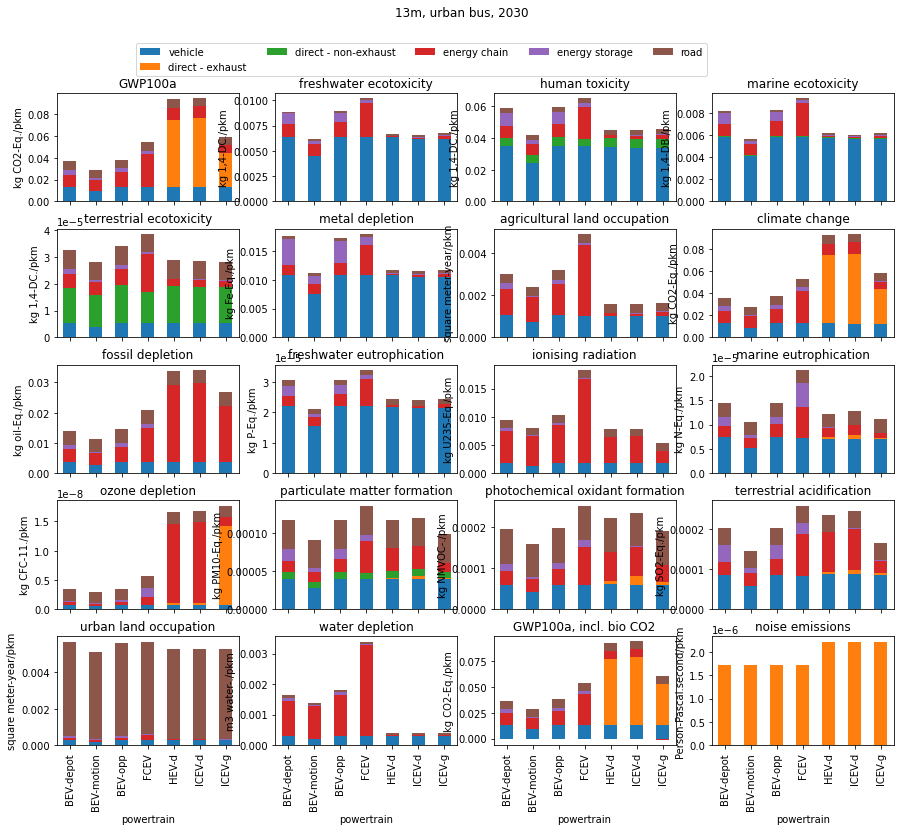

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(figsize=(15, 12), 
                        sharex=True,
                        nrows=5, ncols=4,
                        gridspec_kw=dict(hspace=0.25)
                       ) 


targets = zip([x for x in ic.impact_categories.keys() if x != "natural land transformation"], axs.flatten())

for i, (key, ax) in enumerate(targets):
    df = res.sel(impact_category=key,
            year=2030,
            size="13m-city",
            value=0).to_dataframe("val").unstack()["val"]
    
    df["vehicle"] = df[["powertrain", "glider", "EoL", "maintenance"]].sum(axis=1)
    #df["direct"] = df[["direct - exhaust", "direct - non-exhaust"]].sum(axis=1)
    
    df = df[["vehicle", "direct - exhaust", "direct - non-exhaust","energy chain", "energy storage", "road"]]
    
    df.plot(ax=ax, kind="bar", stacked=True)

    ax.set_title(key)
    ax.set_ylabel(ic.impact_categories[key]["unit"] + "/" + ic.func_unit)
    ax.legend().remove()
    
plt.legend(ncol=5, bbox_to_anchor=(0, 6.5))    
plt.tight_layout(pad=1.5)
plt.suptitle("13m, urban bus, 2030")
plt.show()

C:\Users\sacchi_r\AppData\Local\Temp/ipykernel_14844/3195163423.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.5)


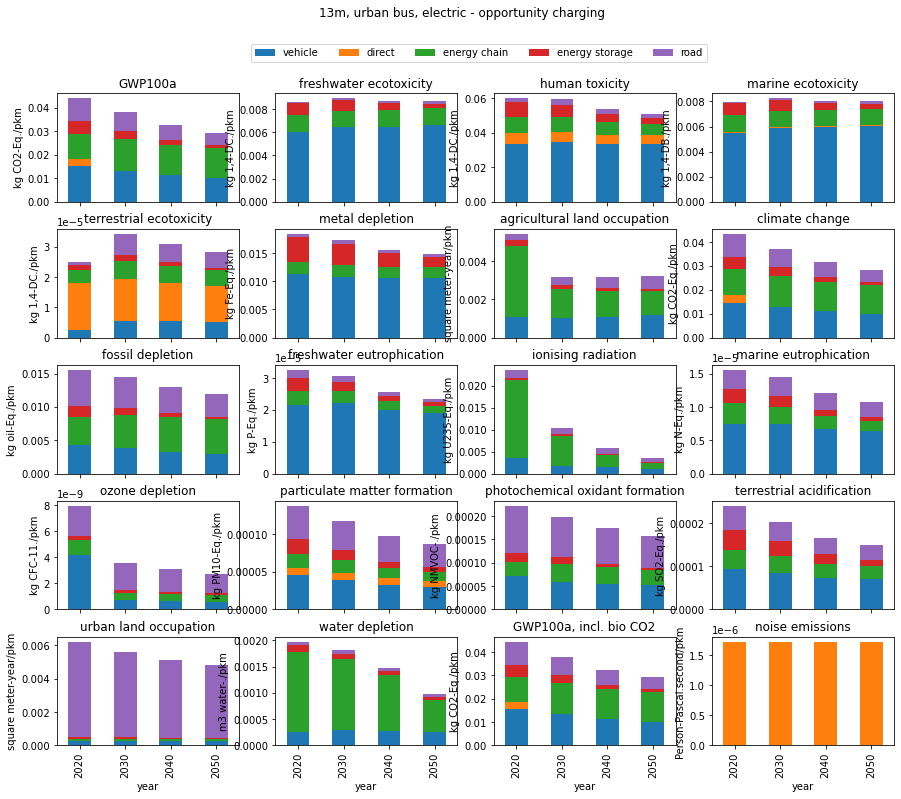

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(figsize=(15, 12), 
                        sharex=True,
                        nrows=5, ncols=4,
                        gridspec_kw=dict(hspace=0.25)
                       ) 


targets = zip([x for x in ic.impact_categories.keys() if x != "natural land transformation"], axs.flatten())

for i, (key, ax) in enumerate(targets):
    df = res.sel(impact_category=key,
            size="13m-city",
                 year=[2020, 2030, 2040, 2050],
                powertrain="BEV-opp",
            value=0).to_dataframe("val").unstack()["val"]
    
    df["vehicle"] = df[["powertrain", "glider", "EoL", "maintenance"]].sum(axis=1)
    df["direct"] = df[["direct - exhaust", "direct - non-exhaust"]].sum(axis=1)
    
    df = df[["vehicle", "direct", "energy chain", "energy storage", "road"]]
    
    df.plot(ax=ax, kind="bar", stacked=True)

    ax.set_title(key)
    ax.set_ylabel(ic.impact_categories[key]["unit"] + "/" + ic.func_unit)
    ax.legend().remove()
    
plt.legend(ncol=5, bbox_to_anchor=(0, 6.5))    
plt.tight_layout(pad=1.5)
plt.suptitle("13m, urban bus, electric - opportunity charging")
plt.show()

C:\Users\sacchi_r\AppData\Local\Temp/ipykernel_14844/3239824043.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.5)


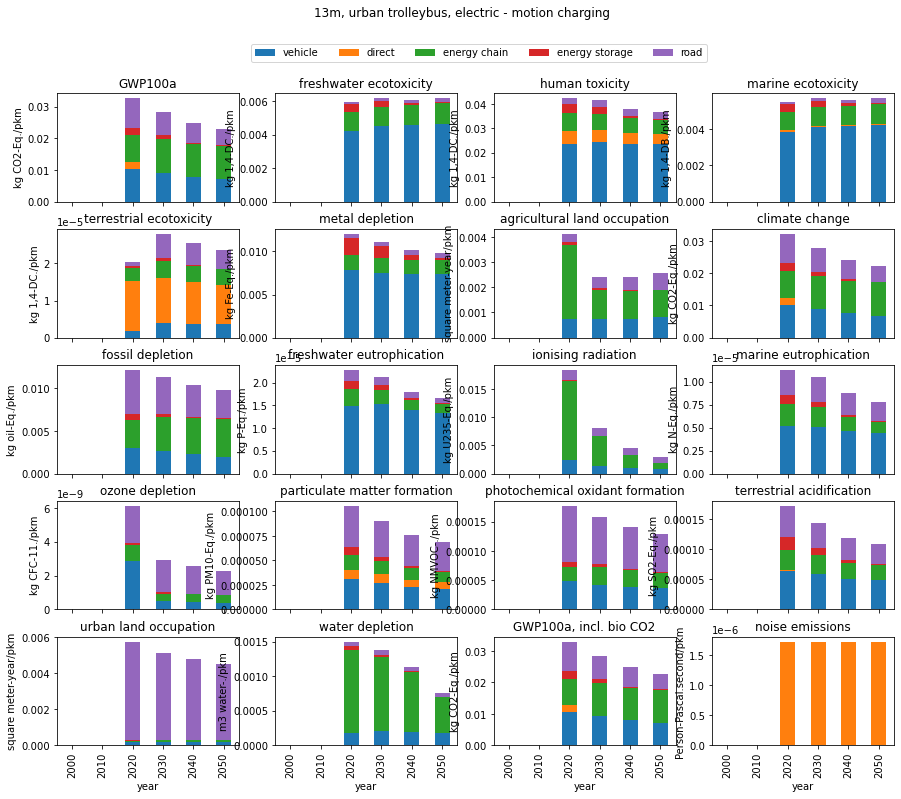

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(figsize=(15, 12), 
                        sharex=True,
                        nrows=5, ncols=4,
                        gridspec_kw=dict(hspace=0.25)
                       ) 


targets = zip([x for x in ic.impact_categories.keys() if x != "natural land transformation"], axs.flatten())

for i, (key, ax) in enumerate(targets):
    df = res.sel(impact_category=key,
            size="13m-city",
                 year=[2000, 2010, 2020, 2030, 2040, 2050],
                powertrain="BEV-motion",
            value=0).to_dataframe("val").unstack()["val"]
    
    df["vehicle"] = df[["powertrain", "glider", "EoL", "maintenance"]].sum(axis=1)
    df["direct"] = df[["direct - exhaust", "direct - non-exhaust"]].sum(axis=1)
    
    df = df[["vehicle", "direct", "energy chain", "energy storage", "road"]]
    
    df.plot(ax=ax, kind="bar", stacked=True)

    ax.set_title(key)
    ax.set_ylabel(ic.impact_categories[key]["unit"] + "/" + ic.func_unit)
    ax.legend().remove()
    
plt.legend(ncol=5, bbox_to_anchor=(0, 6.5))    
plt.tight_layout(pad=1.5)
plt.suptitle("13m, urban trolleybus, electric - motion charging")
plt.show()

C:\Users\sacchi_r\AppData\Local\Temp/ipykernel_14844/904993857.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.5)


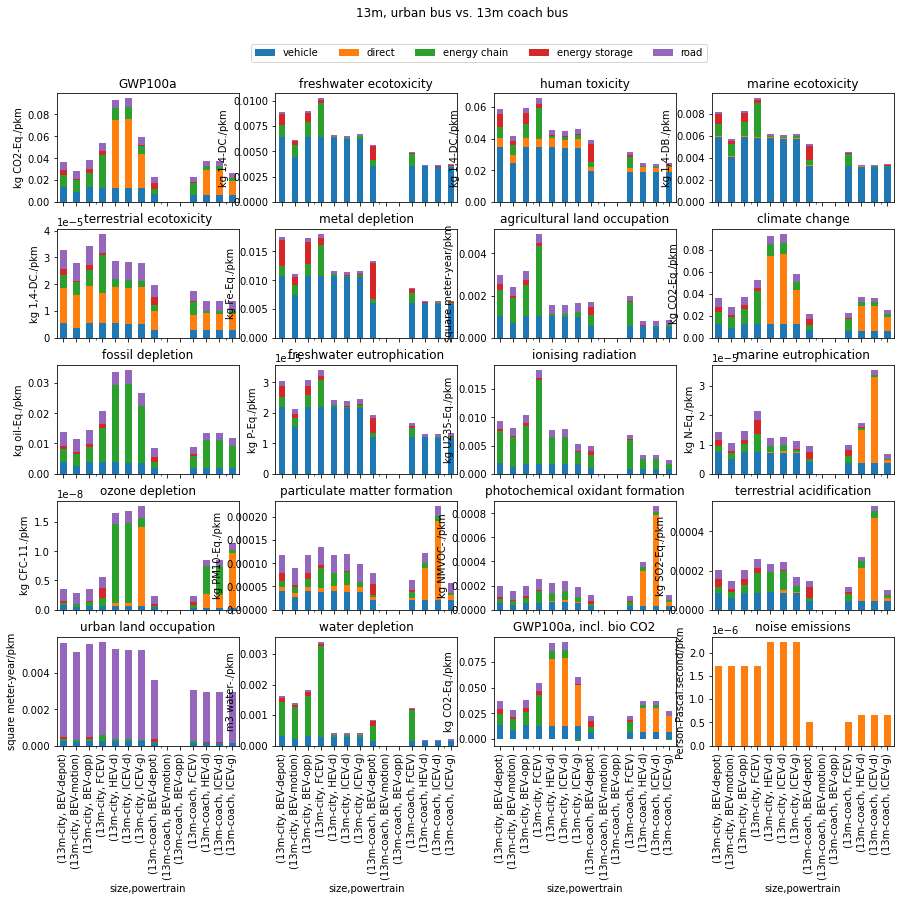

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(figsize=(15, 12), 
                        sharex=True,
                        nrows=5, ncols=4,
                        gridspec_kw=dict(hspace=0.25)
                       ) 


targets = zip([x for x in ic.impact_categories.keys() if x != "natural land transformation"], axs.flatten())

for i, (key, ax) in enumerate(targets):
    df = res.sel(impact_category=key,
                 year=2030, value=0, size=["13m-city", "13m-coach"]).to_dataframe("val").unstack()["val"]
    
    df["vehicle"] = df[["powertrain", "glider", "EoL", "maintenance"]].sum(axis=1)
    df["direct"] = df[["direct - exhaust", "direct - non-exhaust"]].sum(axis=1)
    
    df = df[["vehicle", "direct", "energy chain", "energy storage", "road"]]
    
    df.plot(ax=ax, kind="bar", stacked=True)

    ax.set_title(key)
    ax.set_ylabel(ic.impact_categories[key]["unit"] + "/" + ic.func_unit)
    ax.legend().remove()
    
plt.legend(ncol=5, bbox_to_anchor=(0, 6.5))    
plt.tight_layout(pad=1.5)
plt.suptitle("13m, urban bus vs. 13m coach bus")
plt.show()

C:\Users\sacchi_r\AppData\Local\Temp/ipykernel_14844/1614311759.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.5)


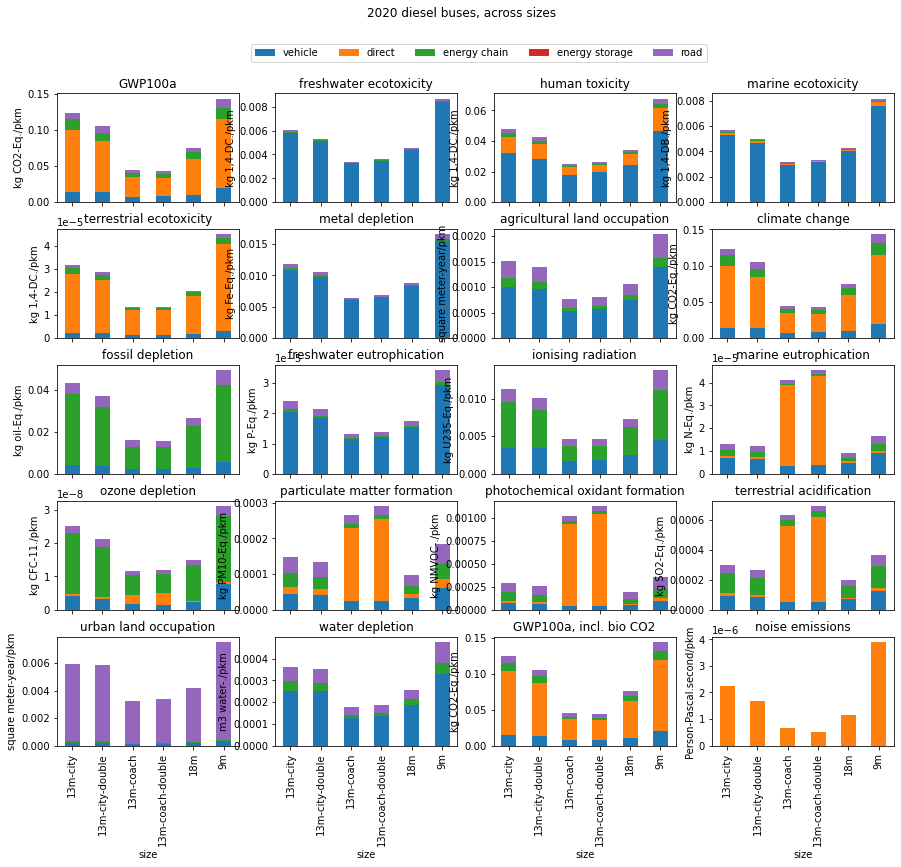

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(figsize=(15, 12), 
                        sharex=True,
                        nrows=5, ncols=4,
                        gridspec_kw=dict(hspace=0.25)
                       ) 


targets = zip([x for x in ic.impact_categories.keys() if x != "natural land transformation"], axs.flatten())

for i, (key, ax) in enumerate(targets):
    df = res.sel(impact_category=key,
                 year=2020, value=0, powertrain="ICEV-d").to_dataframe("val").unstack()["val"]
    
    df["vehicle"] = df[["powertrain", "glider", "EoL", "maintenance"]].sum(axis=1)
    df["direct"] = df[["direct - exhaust", "direct - non-exhaust"]].sum(axis=1)
    
    df = df[["vehicle", "direct", "energy chain", "energy storage", "road"]]
    
    df.plot(ax=ax, kind="bar", stacked=True)

    ax.set_title(key)
    ax.set_ylabel(ic.impact_categories[key]["unit"] + "/" + ic.func_unit)
    ax.legend().remove()
    
plt.legend(ncol=5, bbox_to_anchor=(0, 6.5))    
plt.tight_layout(pad=1.5)
plt.suptitle("2020 diesel buses, across sizes")
plt.show()

# Input parameters uncertainty

In [8]:
import pandas as pd
from carculator_bus import *
bip = BusInputParameters() 
bip.stochastic(100)
dcts, array = fill_xarray_from_input_parameters(
    bip,
    scope={"year":[2020], "size":["9m","18m"], "powertrain":["ICEV-g"]},                        
)
bm = BusModel(array, country="CH")
bm.set_all()

Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+--------------+-----+------+
|              |  9m | 18m  |
+--------------+-----+------+
| ICEV-g, 2020 | 4.1 | 14.6 |
+--------------+-----+------+


### 100 iterations
Show spread of thank-to-wheel consumption (kj/km) for two buses

array([[<AxesSubplot:title={'center':"('9m', 'ICEV-g', 2020)"}>,
        <AxesSubplot:title={'center':"('18m', 'ICEV-g', 2020)"}>]],
      dtype=object)

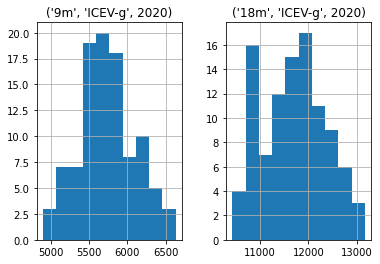

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
bm.array.sel(parameter="TtW energy").to_dataframe("val").unstack()["val"].T.hist()

# Input parameters sensitivity
Test the influence of each nidividual input parameters on results

In [1]:
import pandas as pd
from carculator_bus import *
bip = BusInputParameters() 
bip.static()
dcts, array = fill_xarray_from_input_parameters(
    bip,
    scope={"year":[2040], "size":["9m", "18m"], "powertrain":["ICEV-g"]},
    sensitivity=True
)
bm = BusModel(array, country="CH")
#bm.set_all()

C:\Users\sacchi_r\AppData\Local\Continuum\miniconda3\envs\main_env\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
bm.set_all()

Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+--------------+-----+------+
|              |  9m | 18m  |
+--------------+-----+------+
| ICEV-g, 2040 | 5.0 | 19.0 |
+--------------+-----+------+


In [3]:
ic = InventoryBus(bm)

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['LTO', 'NMC-622'] chemistry/ies
 * Battery cell, LTO
between 2040 and 2054, % of renewable: 88.0.
 * cng is completed by biogas - sewage sludge.
 	 * in 2040 _________________________________________ 22.0%
 * *********************************************************************


In [4]:
res = ic.calculate_impacts(
    sensitivity=True
)

Text(0.5, 1.0, 'Parameters value increased by 10%')

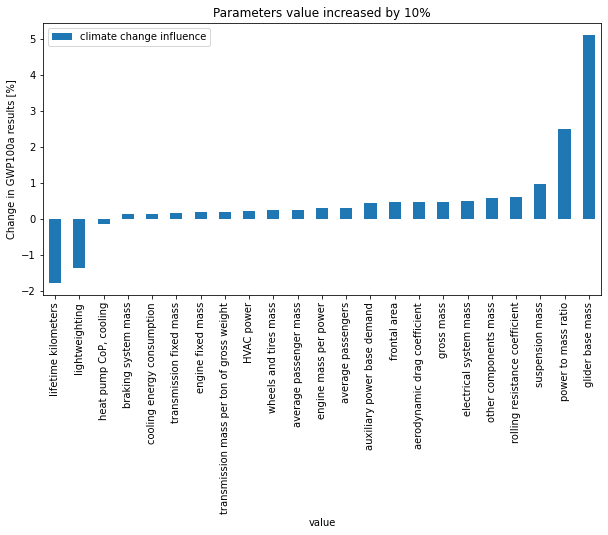

In [5]:
import matplotlib.pyplot as plt
df = res.sel(impact_category="climate change", powertrain="ICEV-g", size="9m", year=2040)\
    .to_dataframe("climate change influence")
df = df.loc[(df["climate change influence"] > 1.001)|(df["climate change influence"] < 1),:]
df["climate change influence"] -= 1 
df["climate change influence"] *= 100 
df = df.sort_values("climate change influence", ascending=True)
df.plot(y = "climate change influence", kind="bar", figsize=(10,5))
plt.ylabel("Change in GWP100a results [%]")
plt.title("Parameters value increased by 10%")

# Export to brightway2 or Simapro

In [6]:
import pandas as pd
from carculator_bus import *
bip = BusInputParameters() 
bip.static()
dcts, array = fill_xarray_from_input_parameters(
    bip,
    scope={"year":[2040], "size":["9m", "18m"], "powertrain":["ICEV-g"]},
)
bm = BusModel(array, country="CH")
bm.set_all()

Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+--------------+-----+------+
|              |  9m | 18m  |
+--------------+-----+------+
| ICEV-g, 2040 | 5.0 | 19.0 |
+--------------+-----+------+


In [10]:
# to brightway2, to link to ecoinvent 3.9, Cut-off
ic = InventoryBus(bm)
ic.export_lci(
    ecoinvent_version="3.8",
    format="file"
)

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['LTO', 'NMC-622'] chemistry/ies
 * Battery cell, LTO
between 2040 and 2054, % of renewable: 88.0.
 * cng is completed by biogas - sewage sludge.
 	 * in 2040 _________________________________________ 22.0%
 * *********************************************************************


0% [###################           ] 100% | ETA: 00:00:00 | Item ID: 655

electric cargo bicycle production, without battery and motor


0% [##############################] 100% | ETA: 00:00:00 | Item ID: 1302
Total time elapsed: 00:00:00


'C:\\Users\\sacchi_r\\Documents\\GitHub\\carculator_bus\\examples\\carculator_lci_bw2.xlsx'

In [11]:
# to brightway2, to link to ecoinvent 3.9, Cut-off
ic = InventoryBus(bm)
ic.export_lci(
    ecoinvent_version="3.8",
    software="simapro",
    format="file"
)

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['LTO', 'NMC-622'] chemistry/ies
 * Battery cell, LTO
between 2040 and 2054, % of renewable: 88.0.
 * cng is completed by biogas - sewage sludge.
 	 * in 2040 _________________________________________ 22.0%
 * *********************************************************************


0% [##############################] 100% | ETA: 00:00:00 | Item ID: 1302
Total time elapsed: 00:00:00


electric cargo bicycle production, without battery and motor
electric cargo bicycle production, without battery and motor


'C:\\Users\\sacchi_r\\Documents\\GitHub\\carculator_bus\\examples\\carculator_lci_simapro.csv'

For questions or to report bugs: [romain.sacchi@psi.ch](mailto:romain.sacchi@psi.ch)

Additional modeling assumptions described in the documentation.

Or

**Life cycle inventories for on-road vehicles**\
Sacchi, R., Bauer, C., 2023, Paul Scherrer Institut.
https://doi.org/10.5281/zenodo.5156043